<a href="https://colab.research.google.com/github/ajaythakur3369/TechnoHacks-Projects/blob/main/Machine_Learning_Project_Fraud_Transaction_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Fraud Transaction Detection**
## **Project Type - Machine Learning Project**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Guided By - Mr. Sandip Gavit (Founder of TechnoHacks EduTech Private Limited)**
## **Submitted To - TechnoHacks EduTech Private Limited, Nashik, Maharashtra - 422001, India**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/TechnoHacks-Projects)**
## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1BMZK4PK3qyuQcFOl_mmvM8D5aytR5lB7)**

In [ ]:
# Import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Access the Drive from Colab, for accessing required file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Path, for accessing required file from Drive
df = pd.read_csv('/content/drive/MyDrive/folders/creditcard.csv')

In [ ]:
# Display dataset
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

Here,

**Time** represents seconds elapsed between each transaction,

**Amount** represents total number of transaction value,

**Class** represents label given from transactions, where 0 represent a normal transaction and 1 refers to a fraudulent transaction, and

**V1 to V28** represents personal data of customers (anonymized)

In [ ]:
# Display shape of the dataset
print(df.shape)

(284807, 31)


In [ ]:
# Display information of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Check the missing values in the dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

In [ ]:
# Check the distribution of 'Class' column values by using value_counts() function, which returns an object containing counts of unique values
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

It shows that the data is highly imbalanced as there are more legal transactions than fraudalent tractions.

This has to be balanced to impliment ML algorithms

Checking Outliers in 'Amount' values :



In [ ]:
# Check the distribution of 'Amount' column values by using value_counts() function, which returns an object containing counts of unique values
df['Amount'].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: Amount, Length: 32767, dtype: int64

Now, we will perform a cleaning of these values



#### 3. **Outlier -** It is a data-item/object that deviates significantly from the rest of the (so-called normal) objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. It is defined as being any point of data that lies over 1.5 IQRs (Inter Quartile Range) below the first quartile (Q1) or above the third quartile (Q3) in a data set. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.

In [ ]:
# Find the quantile (Amount) of '0.25' and '0.75' for each column in the dataset
q1_amount = df.Amount.quantile(0.25)
q3_amount = df.Amount.quantile(0.75)
IQR_amount = q3_amount - q1_amount

In [ ]:
# Display IQR (Inter Quartile Range) value
print('IQR: ', IQR_amount)

IQR:  71.565


In [ ]:
# Define the limits of outliers
sup_amount = q3_amount + 1.5 * IQR_amount # This is 1.5 times IQR + quartile 3, called Higher Range Limit
inf_amount = q1_amount - 1.5 * IQR_amount # This is 1.5 times IQR - quartile 1, called Lower Range Limit

In [ ]:
# Display upper limit
print('Upper limit: ', sup_amount)

Upper limit:  184.5125


In [ ]:
# Display lower limit
print('Lower limit: ', inf_amount)

Lower limit:  -101.7475


### **Let's Clean the Outliers**

In [ ]:
# Copy the dataset, by using copy() function
df_clean = df.copy()

In [ ]:
# Drop 'Amount' values from df_clean dataset, for cleaning the outliers
df_clean.drop(df_clean[df_clean.Amount>184.513].index, axis = 0, inplace = True)

In [ ]:
# Check the distribution of Amount values by using value_counts() function, which returns an object containing counts of unique values
df_clean['Amount'].value_counts()

1.00      13688
1.98       6044
0.89       4872
9.99       4747
15.00      3280
          ...  
182.63        1
92.16         1
76.54         1
128.32        1
95.63         1
Name: Amount, Length: 15793, dtype: int64

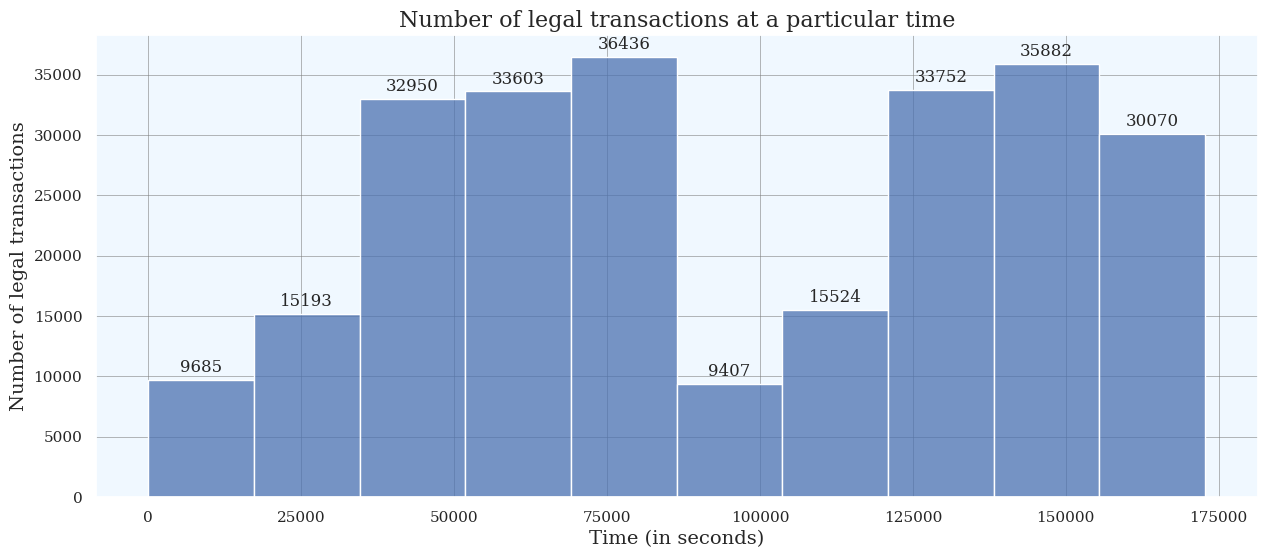

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.histplot(x = (df_clean.Time[df_clean.Class == 0]), bins = 10)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Time (in seconds)", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Number of legal transactions', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Number of legal transactions at a particular time', fontname = 'serif', fontsize = 16)
plt.show()

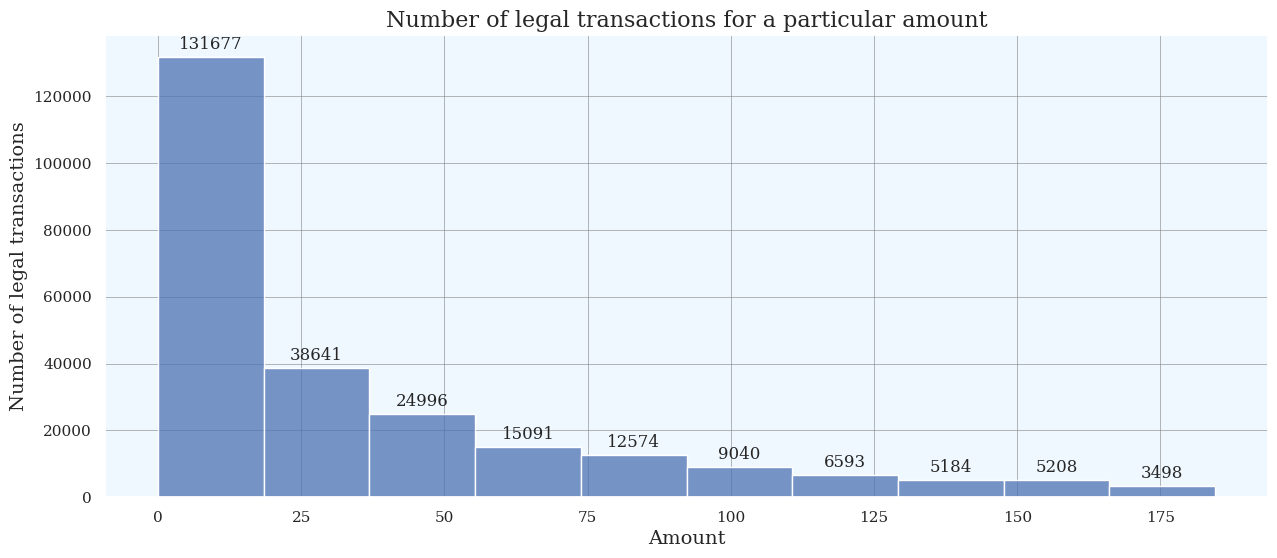

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.histplot(x = (df_clean.Amount[df_clean.Class == 0]), bins = 10)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Amount", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Number of legal transactions', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Number of legal transactions for a particular amount', fontname = 'serif', fontsize = 16)
plt.show()

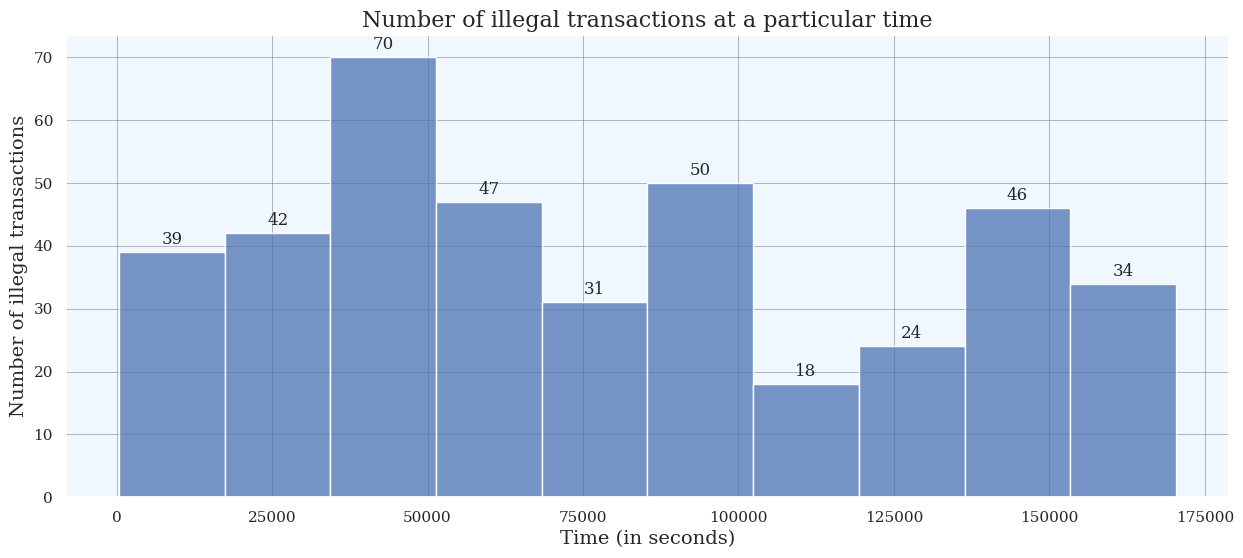

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.histplot(x = (df_clean.Time[df_clean.Class == 1]), bins = 10)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Time (in seconds)", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Number of illegal transactions', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Number of illegal transactions at a particular time', fontname = 'serif', fontsize = 16)
plt.show()

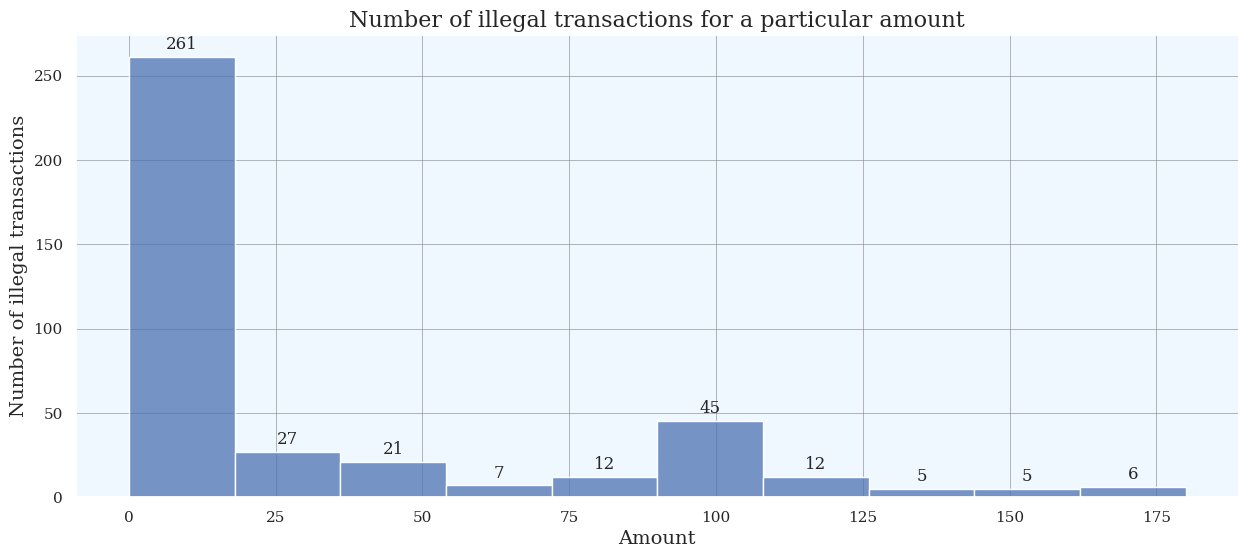

In [ ]:
# Graph representation
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)
colors = sns.color_palette("muted")
ax = sns.histplot(x = (df_clean.Amount[df_clean.Class == 1]), bins = 10)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Amount", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Number of illegal transactions', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Number of illegal transactions for a particular amount', fontname = 'serif', fontsize = 16)
plt.show()

**Data Preprocessing**

Before we create the machine learning model, we will need to make some adjustments to the dataset values. The steps are listed below:

Standardize the Time and Amount values;

Divide the dataset into train and test;

Balance the values.


In [ ]:
# Import all the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

Standardization

In [ ]:
# creating a copy of the original dataset
df_new = df_clean.copy()

In [ ]:
# standardize data
scaler = StandardScaler()
df_new['Amount'] = scaler.fit_transform(df_new.Amount.values.reshape(-1, 1))
df_new['Time'] = scaler.fit_transform(df_new.Time.values.reshape(-1, 1))

In [ ]:
# check the standardized data
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.995729,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.718502,0
1,-1.995729,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.765550,0
3,-1.995708,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.099136,0
4,-1.995687,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.830290,0
5,-1.995687,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.742312,0


### **Defining Features and Target**

In [ ]:
# Display new dataset X, after removing 'Class' column with specifying axis 1, by using drop() method
X = df_new.drop('Class', axis = 1)
print(X)

            Time         V1         V2        V3        V4        V5  \
0      -1.995729  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1      -1.995729   1.191857   0.266151  0.166480  0.448154  0.060018   
3      -1.995708  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4      -1.995687  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5      -1.995687  -0.425966   0.960523  1.141109 -0.168252  0.420987   
...          ...        ...        ...       ...       ...       ...   
284801  1.634598   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  1.634619 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  1.634640  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  1.634661   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  1.634661  -0.240440   0.530483  0.702510  0.689799 -0.377961   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [ ]:
# Display another dataset y, with 'Class' column
y = df_new['Class']
print(y)

0         0
1         0
3         0
4         0
5         0
         ..
284801    0
284802    0
284803    0
284804    0
284805    0
Name: Class, Length: 252903, dtype: int64


### **Split the dataset into Training Set and Test Set**

In [ ]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, stratify = y)

Balancing dataset

In [ ]:
# Implement RandomUnderSampler, it is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes
rus = RandomUnderSampler()

In [ ]:
# Ensure that the “majority” class and the “minority” class will have a 1:1 class distribution, by using fit_resample() function
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# Return an object containing counts of unique values, by using value_counts() function
# This means it enables us to count the number of unique elements in a column of a Pandas dataframe
print(pd.Series(y_rus).value_counts())

0    301
1    301
Name: Class, dtype: int64


## **ML Model Implementation**


### **Logistic Regression -** Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. It is used for classification algorithms its name is logistic regression.

In [ ]:
# Implement logistic regression
model = LogisticRegression()

In [ ]:
# Fit the algorithm for logistic regression, by using fit() function
model.fit(X_rus, y_rus, sample_weight = True)

LogisticRegression()

In [ ]:
# Predict the logistic regression of X_test dataset of the test set, using predict() function
y_pred = model.predict(X_test)

In [ ]:
# Predict the probability of logistic regression of X_test dataset of the test set, using predict_proba() function
y_proba = model.predict_proba(X_test)

In [ ]:
# Import some required libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### **Classification Report -** It is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of the trained classification model.

**Precision -** It is defined as the ratio of true positives to the sum of true and false positives.

**Recall -** It is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1 Score -** It is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

**Support -** It is the number of actual occurrences of the class in the dataset. It doesn't vary between models, it just diagnoses the performance evaluation process.

**Macro-averaged -** all classes equally contribute to the final averaged metric.

**Weighted-averaged -** each classes's contribution to the average is weighted by its size.

In [ ]:
# Display/Measure the quality of predictions from a classification algorithm, by using classification_report()
print("Classification Report: ", classification_report(y_test, y_pred, digits = 3))

Classification Report:                precision    recall  f1-score   support

           0      1.000     0.950     0.974     63126
           1      0.028     0.910     0.054       100

    accuracy                          0.949     63226
   macro avg      0.514     0.930     0.514     63226
weighted avg      0.998     0.949     0.973     63226



In [ ]:
# Define the performance of a classification algorithm, by using confusion_matrix(). It visualizes and summarizes the performance of the algorithm.
cm = confusion_matrix(y_test, y_pred)

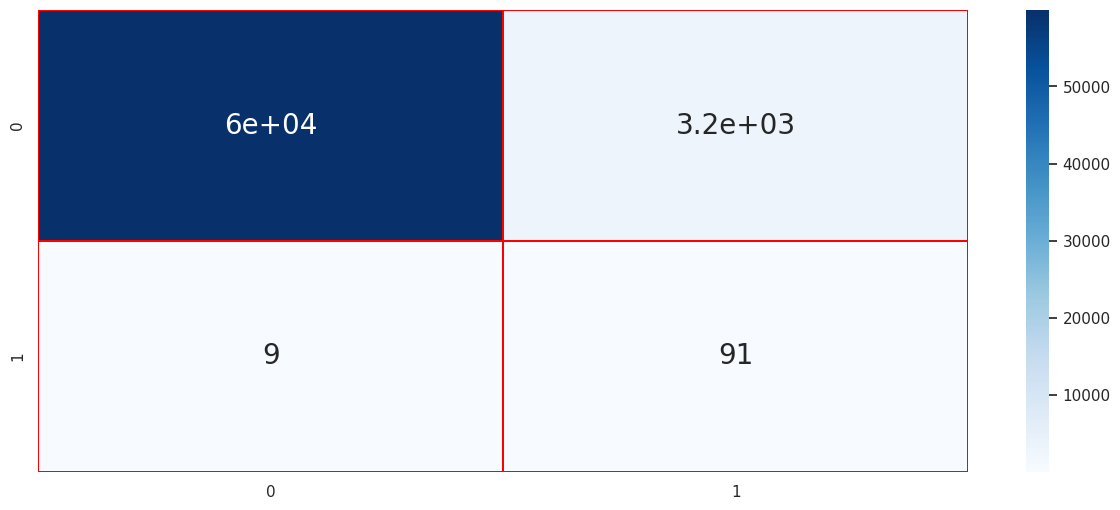

In [ ]:
# Represent the coefficients of cm to visualize the strength of correlation among variables in Heatmap, using sns
# It helps in finding the features that are best for Machine Learning model building and transforms the correlation matrix into color coding
sns.heatmap(cm, annot = True, cmap = 'Blues', linewidths = 0.3, linecolor = 'red', annot_kws = {"size": 20})
plt.show()